In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import geopandas
import geoplot
import geoplot.crs as gcrs

import json
import seaborn as sns

In [11]:
yield_data = pd.read_csv('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\hvstat_africa_data.csv')
#yield_data = yield_data.loc[(yield_data['product'] == 'Maize')]
kenya_data = yield_data.loc[yield_data['country'] == 'Kenya']

In [12]:
kenya_data['product'].unique()

array(['Banana', 'Beans (mixed)', 'Cassava', 'Coriander', 'Cowpea',
       'Kale', 'Maize', 'Mung bean', 'Pigeon Pea', 'Sorghum',
       'Sweet Potatoes', 'Taro', 'Tomato', 'Watermelon',
       'Bambara groundnut', 'Cashew (unshelled)', 'Coffee', 'Cotton',
       'Groundnuts (In Shell)', 'Jute', 'Millet', 'Pineapple', 'Potato',
       'Rice', 'Sesame Seed', 'Sugarcane', 'Sunflower Seed', 'Cabbage',
       'Pea', 'Onions', 'Carrots', 'Macadamia', 'Wheat', 'Barley',
       'Canola Seed', 'Pyrethrum', 'Tea', 'Tobacco', 'Yams'], dtype=object)

In [10]:
for_comp_columns = ['fnid', 'planting_year', 'production']
SR_data = kenya_data.loc[kenya_data['season_name'] == 'Short'][for_comp_columns]
LR_data = kenya_data.loc[kenya_data['season_name'] == 'Long'][for_comp_columns]
annual_data = kenya_data.loc[kenya_data['season_name'] == 'Annual'][for_comp_columns]
stacked = annual_data.merge(SR_data, on=['fnid', 'planting_year'], suffixes=(' annual', ' SR')).merge(LR_data, on=['fnid', 'planting_year'], suffixes=(' annual', ' LR'))

In [11]:
stacked

,fnid,planting_year,production annual,production SR,production
0,KE2013A101,1991,953.000000,270.00,450.00
1,KE2013A101,1995,232.000000,28.98,428.67
2,KE2013A101,1996,441.000000,119.97,119.07
3,KE2013A101,1997,545.994599,4.41,516.96
4,KE2013A101,1998,308.370837,29.70,188.37
...,...,...,...,...,...
458,KE2013A146,2020,67562.750000,8686.53,60561.00
459,KE2013A146,2021,61937.000000,4343.31,58113.00
460,KE2013A147,2019,1086.730000,71.28,10541.07
461,KE2013A147,2020,971.840000,223.38,268.02


In [4]:
#kenya_data.loc[kenya_data['season_name'] == 'Long']#dropna(subset = ['production'])

In [57]:
#fig, ax = plt.subplots()
#sns.barplot(data = yield_data, x = 'admin_1', y='value', estimator = 'mean', errorbar = 'sd', ax=ax)
#ax.tick_params(axis='x', labelrotation=90)

In [3]:
adm_data = geopandas.read_file('C:\\Users\\wlwc1989\\Documents\\yield_modelling\\data\\KE_boundaries\\adm_boundaries.geojson')
adm_data.drop(columns = ['end_date', 'country_code', 
                         'fewsnet_region', 'geographic_group', 
                         'es_name', 'fr_name', 'pt_name',
                         'ar_name', 'country', 'admin_0',
                         'admin_3', 'admin_4', 'layer_id',
                         'geographicunitsetversion_name', 'zone_type', 'urban_rural', 'start_month',
                         'layer_name'
                         ], inplace=True)
#adm_data = adm_data.explode()#.crs
adm_data = adm_data.loc[adm_data['unit_type_code'] == 'admin1']
adm_data = adm_data.loc[(adm_data['name'] != 'Nairobi') & (adm_data['name'] != 'Mombasa')]
adm_data.loc[:, 'centroid'] = adm_data.loc[:, 'geometry'].to_crs(crs=3857).centroid.to_crs('EPSG:4326')
adm_data_for_merging = adm_data.drop_duplicates(subset = ['fnid']).drop(columns=['fnid', 'admin_2', 'start_date', 'id'])
yield_data_polygons = adm_data_for_merging.merge(yield_data, on=['admin_1'], how='right', suffixes=('raw', 'cropped')).dropna()#yield_data.merge(, on=['fnid'], how='left')#, validate='one_to_many')

Skipping field centroid: unsupported OGR type: 3


In [13]:
#yield_data.columns.to_list()
#adm_data['area discrepancy'] = adm_data['geometry'].to_crs(crs=3857).area/adm_data['area']
#adm_data.loc[(adm_data['area discrepancy']) < 1].sort_values(by='area discrepancy', ascending=False).head()
#yield_data['prod_from_yield'] = yield_data['yield']*yield_data['area']
#yield_data['prop_error'] = yield_data['prod_from_yield']/yield_data['production']
#yield_data['prop_error'].max()
#sns.histplot(yield_data['prod_from_yield']/yield_data['production'], bins=30)

In [14]:
#yield_data_polygons.columns.to_list()

In [15]:
#for year in range(1975, 2025):
#    obsnum = len(yield_data_polygons.loc[yield_data_polygons['season_year'] == f'Annual harvest {year}'])
#    print(f'Year {year}: {obsnum}')
#for_plotting = yield_data_polygons.loc[yield_data_polygons['season_year'] == 'Annual harvest 2020']#.columns.to_list()
#geoplot.polyplot(for_plotting)
#fig, ax = plt.subplots()
#yield_plot = geoplot.choropleth(for_plotting, hue='value', cmap='Oranges', ax=ax, legend=True)
#plt.colorbar(yield_plot)

In [16]:
#fig, axs = plt.subplots(1, 2)
#norm = mpl.colors.Normalize(vmin=0.,vmax=3.5)
#geoplot.choropleth(yield_data_mean.dropna(), hue='value', cmap='Oranges', ax=axs[0], legend=True, norm=norm, legend_kwargs={'fraction': 0.05})
#norm = mpl.colors.Normalize(vmin=0.,vmax=1)
#geoplot.choropleth(yield_data_std.dropna(), hue='value', cmap='Blues', ax=axs[1], legend=True, norm=norm, legend_kwargs={'fraction': 0.05})

In [ ]:
adm1 = ['Isiolo', 'Turkana', 'Marsabit', 'Wajir', 'Mandera', 'Garissa']

In [17]:
#sns.histplot(yield_data_polygons['areacropped']/(yield_data_polygons['arearaw']*100), bins=300)

In [25]:
yield_data_polygons['maize density'] = yield_data_polygons['areacropped']/(yield_data_polygons['arearaw']*100)

In [18]:
#yield_data_polygons.columns.to_list()

In [19]:
#yield_data_polygons.loc[yield_data_polygons['maize density'] < 0.1].iloc[:, :]['name'].unique()#.head()#['planting_year'].unique()#min()

In [25]:
#yield_data_polygons.dropna()#.columns.to_list()

In [ ]:
mean_yields = yield_data_polygons[['admin_1', 'geometry', 'yield']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()
mean_prod = yield_data_polygons[['admin_1', 'geometry', 'production']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()


KeyError: "['maize density'] not in index"

In [27]:
mean_density = yield_data_polygons[['admin_1', 'geometry', 'maize density']].dissolve(by = 'admin_1', aggfunc='mean').reset_index()


In [21]:
year_counts = yield_data_polygons[['admin_1', 'geometry', 'yield']].dissolve(by = 'admin_1', aggfunc='count').reset_index()

In [23]:
kenya_data

,fnid,country,country_code,admin_1,admin_2,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,qc_flag,area,production,yield
79204,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1977,1,1976,12,All (PS),0,900.0,NaN,NaN
79205,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1978,1,1977,12,All (PS),0,623.0,NaN,NaN
79206,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1979,1,1978,12,All (PS),0,496.0,NaN,NaN
79207,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1980,1,1979,12,All (PS),0,540.0,NaN,NaN
79208,KE2013A101,Kenya,KE,Mombasa,none,Maize,Annual,1981,1,1980,12,All (PS),0,1025.0,1253.30,1.222732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93642,KE2013A147,Kenya,KE,Nairobi,none,Maize,Short,2018,10,2020,3,All (PS),0,950.0,684.00,0.720000
93643,KE2013A147,Kenya,KE,Nairobi,none,Maize,Short,2019,10,2021,3,All (PS),0,293.0,71.28,0.243276
93644,KE2013A147,Kenya,KE,Nairobi,none,Maize,Short,2020,10,2022,3,All (PS),0,424.0,223.38,0.526840
93645,KE2013A147,Kenya,KE,Nairobi,none,Maize,Short,2021,10,2023,3,All (PS),0,430.0,140.40,0.326512


In [26]:
#year_counts

In [24]:
std_yields = yield_data_polygons[['admin_1', 'geometry', 'yield']].dissolve(by = 'admin_1', aggfunc=['std', 'mean']).reset_index()

In [32]:
std_yields.columns[2]

('yield', 'std')

In [33]:
std_yields['normalized std'] = std_yields[('yield', 'std')] / std_yields[('yield', 'mean')] 

In [95]:
mean_prod = mean_prod.explode()
mean_yields = mean_yields.explode()
mean_density = mean_density.explode()

In [64]:
mean_prod.loc[:, 'centroid'] = mean_prod.loc[:, 'geometry'].to_crs(crs=3857).centroid.to_crs('EPSG:4326')

In [65]:
mean_prod.set_geometry('centroid', inplace=True)

In [68]:
empty_point = mean_prod['centroid'].unique()[0]
mean_prod = mean_prod.loc[mean_prod['centroid'] != empty_point]

Text(0.5, 0.98, 'Mean yield, annual yield variation and maize density by admin1 in Kenya')

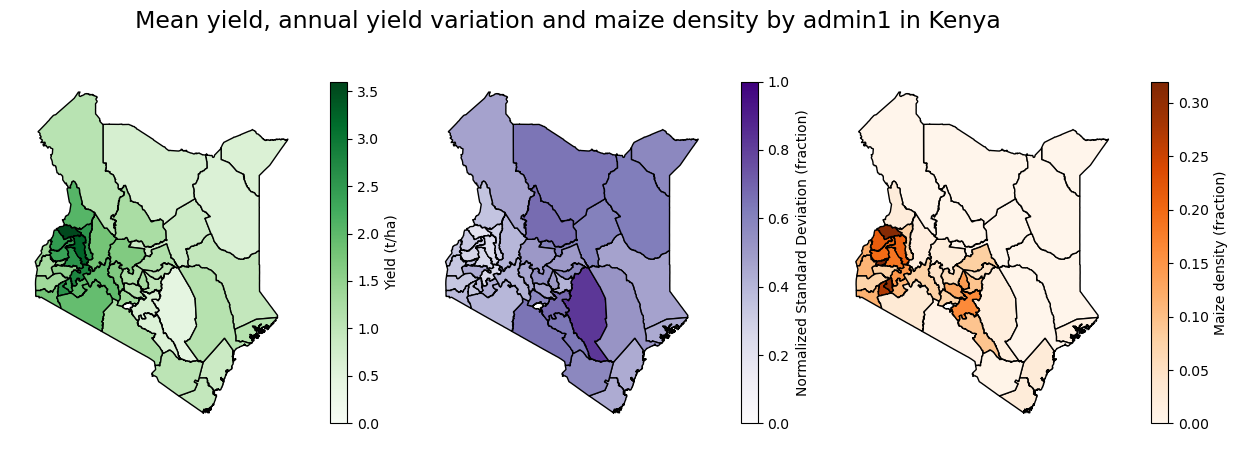

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
norm = mpl.colors.Normalize(vmin=0.,vmax=3.6)
geoplot.choropleth(mean_yields.dropna().explode(), hue='yield', cmap='Greens',norm=norm, ax=axs[0], legend=True, legend_kwargs={'fraction': 0.05, 'label': 'Yield (t/ha)'})
#norm = mpl.colors.Normalize(vmin=0.,vmax=1)
#geoplot.choropleth(mean_prod.dropna().explode(), hue='production', cmap='Blues', ax=axs[1], legend=True, legend_kwargs={'fraction': 0.05})
#geoplot.cartogram(mean_prod.dropna().explode(), scale='production', ax=axs[1])
#mean_prod.set_geometry('centroid', inplace=True)
#geoplot.pointplot(mean_prod.dropna(), hue='production', ax=axs[1])#, legend=True, legend_kwargs={'fraction': 0.05}, cmap='Blues', scale='production', limits=(0, None))
#mean_prod.set_geometry('geometry', inplace=True)
#geoplot.polyplot(mean_prod.explode(), ax=axs[1])
norm = mpl.colors.Normalize(vmin=0.,vmax=0.32)
geoplot.choropleth(mean_density.dropna().explode(), hue='maize density', cmap='Oranges', ax=axs[2], norm=norm, legend=True, legend_kwargs={'fraction': 0.05, 'label': 'Maize density (fraction)'})
norm = mpl.colors.Normalize(vmin=0.,vmax=1)
geoplot.choropleth(std_yields.dropna().explode(), hue='normalized std', norm=norm, cmap='Purples', ax=axs[1], legend=True, legend_kwargs={'fraction': 0.05, 'label': 'Normalized Standard Deviation (fraction)'})
fig.suptitle('Mean yield, annual yield variation and maize density by admin1 in Kenya', fontsize = 17)

<Axes: xlabel='maize density', ylabel='Count'>

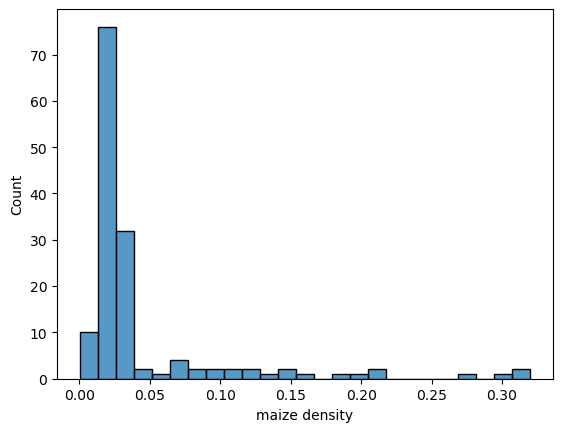

In [118]:
sns.histplot(mean_density['maize density'])

In [25]:
#for_plotting['value']

In [26]:
#adm_data.apply(lambda srs: eval(srs[13])['FNID'], axis = 1)#.iloc[0, 13]['attributes']['FNID']

In [27]:
#geom = adm_data.pop('geometry')
#geom = geom.apply(lambda x: list(x) if isinstance(x, geopandas.MultiPolygon) else x).explode()
#adm_data = adm_data.join(geom, how='inner')

In [97]:
#yield_data[['admin_2', 'value']].groupby('admin_2').std()

In [28]:
#sns.barplot(yield_data.groupby('fnid'))